# MINERÍA DE TEXTOS

## Alumna: Jessica Sarahi Méndez Rincón


###  Proyecto Analisis de Sentimientos y Polaridad en Tweets con algoritmos de análisis en letras musicales

## Contexto:
    
    El año 2020 se vio afectado por el impacto a la sociedad mundial sobre una gripe de alto nivel de contagio así como la causa principal de fallecimientos alrededor del Mundo.
    
    México no ha sido exento del raro virus.
    
    Con el presente Proyecto, el objetivo primordial es desarrollar los algoritmos que ayuden a monitorizar el efecto en los comentarios que en la Red Social de Twitter se emiten, y que ayudé a dar una idea del estado de ánimo de la gente.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQUpnfdhCKN1C3OIbNrDdyjctlRsA9t6386WWD8JkUzt_X7JiuH&usqp=CAU" alt="Alt text that describes the graphic" title="Title text" />

In [1]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Tienes que descargarte las stopwords primero via nltk.download()
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict 
from sklearn import model_selection, naive_bayes, svm
import seaborn as sns
import matplotlib.pyplot as pl
import fileinput
import sys, glob

In [2]:
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))


## Preparar los datos


In [3]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['tweet']
dataset2 = pd.read_csv('tweets0.txt', sep='\t',names=names)

In [4]:
dataset2.head()

,tweet
0,@BeatrizGMuller @lopezobrador_ @HLGatell @John...
1,Pue' ser...
2,"@FerMG33_ No quiero ser mamona, pero le falta ..."
3,@webcamsdemexico @PueblaEsMexico Un cocodrilo ...
4,#LopezLargateYa #LopezFracasoPresidencial


In [5]:
dataset2.describe

<bound method NDFrame.describe of                                                   tweet
0     @BeatrizGMuller @lopezobrador_ @HLGatell @John...
1                                           Pue' ser...
2     @FerMG33_ No quiero ser mamona, pero le falta ...
3     @webcamsdemexico @PueblaEsMexico Un cocodrilo ...
4             #LopezLargateYa #LopezFracasoPresidencial
5                                ⚠️👇🏻⚠️👇🏻⚠️👇🏻⚠️👇🏻⚠️👇🏻⚠️
6          @atalia95 Luego esto https://t.co/HlYJcpumjF
7                       Qué pinches ganas de cosa seria
8                              Me recordó a alguien 🙃🙄🤩
9            @manuevas Acá en Mex les decimos cachondos
10                                 Pero qué necesidad 😔
11    Todos necesitamos ese momento de oscuridad par...
12    @HectorR18264358 @vanhot7 Ase. Es. Te aborda q...
13      - Incendia la casa y culpa a Winston Churchill 
14                                🤣🤣🤣🤣🤣🤣🤣🤭🤭🤭🤭🤭🤭🤭🤭🤭😜😜😜😜😜
15                        @SinlineaMx De q se preocupan
16            

# Análisis de Sentimientos

In [6]:
#pip install bidict
#pip install py_lex
#conda install -c conda-forge python-marisa-trie

In [7]:
from py_lex import EmoLex

In [8]:
lexicon = EmoLex('lexicon_spanish.txt')

In [9]:
lemmatizer = WordNetLemmatizer() 
dataset2['tweetF']=[lemmatizer.lemmatize(w,'v') for w in dataset2.tweet] 
dataset2.head()


,tweet,tweetF
0,@BeatrizGMuller @lopezobrador_ @HLGatell @John...,@BeatrizGMuller @lopezobrador_ @HLGatell @John...
1,Pue' ser...,Pue' ser...
2,"@FerMG33_ No quiero ser mamona, pero le falta ...","@FerMG33_ No quiero ser mamona, pero le falta ..."
3,@webcamsdemexico @PueblaEsMexico Un cocodrilo ...,@webcamsdemexico @PueblaEsMexico Un cocodrilo ...
4,#LopezLargateYa #LopezFracasoPresidencial,#LopezLargateYa #LopezFracasoPresidencial


In [10]:
dataset2.head(5)

,tweet,tweetF
0,@BeatrizGMuller @lopezobrador_ @HLGatell @John...,@BeatrizGMuller @lopezobrador_ @HLGatell @John...
1,Pue' ser...,Pue' ser...
2,"@FerMG33_ No quiero ser mamona, pero le falta ...","@FerMG33_ No quiero ser mamona, pero le falta ..."
3,@webcamsdemexico @PueblaEsMexico Un cocodrilo ...,@webcamsdemexico @PueblaEsMexico Un cocodrilo ...
4,#LopezLargateYa #LopezFracasoPresidencial,#LopezLargateYa #LopezFracasoPresidencial


In [11]:
dataset2['tweetF'] = dataset2.tweetF.str.strip().str.split('[\W_]+')

In [12]:
rows = list()
for row in dataset2[['tweetF']].iterrows():
    r = row[1]
    for word in r.tweetF:
        rows.append((word))

tweet3 = pd.DataFrame(rows, columns=['tweet'])
tweet3.head()

,tweet
0,
1,BeatrizGMuller
2,lopezobrador
3,HLGatell
4,JohnMAckerman


In [13]:

summary = lexicon.summarize_doc(tweet3)
summary

{'anticipation': 0.0,
 'disgust': 0.0,
 'sadness': 0.0,
 'anger': 0.0,
 'positive': 0.0,
 'joy': 0.0,
 'fear': 0.0,
 'negative': 0.0,
 'trust': 0.0,
 'surprise': 0.0}

In [14]:

dataset2['anger'] = 0.0
dataset2['anticipation'] = 0.0
dataset2['disgust'] = 0.0
dataset2['fear'] = 0.0
dataset2['joy'] = 0.0
dataset2['negative'] = 0.0
dataset2['positive'] = 0.0
dataset2['sadness'] = 0.0
dataset2['surprise'] = 0.0
dataset2['trust'] = 0.0

In [15]:
dataset2.head(5)

,tweet,tweetF,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,@BeatrizGMuller @lopezobrador_ @HLGatell @John...,"[, BeatrizGMuller, lopezobrador, HLGatell, Joh...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pue' ser...,"[Pue, ser, ]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"@FerMG33_ No quiero ser mamona, pero le falta ...","[, FerMG33, No, quiero, ser, mamona, pero, le,...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,@webcamsdemexico @PueblaEsMexico Un cocodrilo ...,"[, webcamsdemexico, PueblaEsMexico, Un, cocodr...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#LopezLargateYa #LopezFracasoPresidencial,"[, LopezLargateYa, LopezFracasoPresidencial]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:

for index, _ in dataset2.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),dataset2.loc[index].tweetF))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            dataset2.at[index, key] = summary[key]
            #print(dataset2.at[index, key] )
    except:
        continue

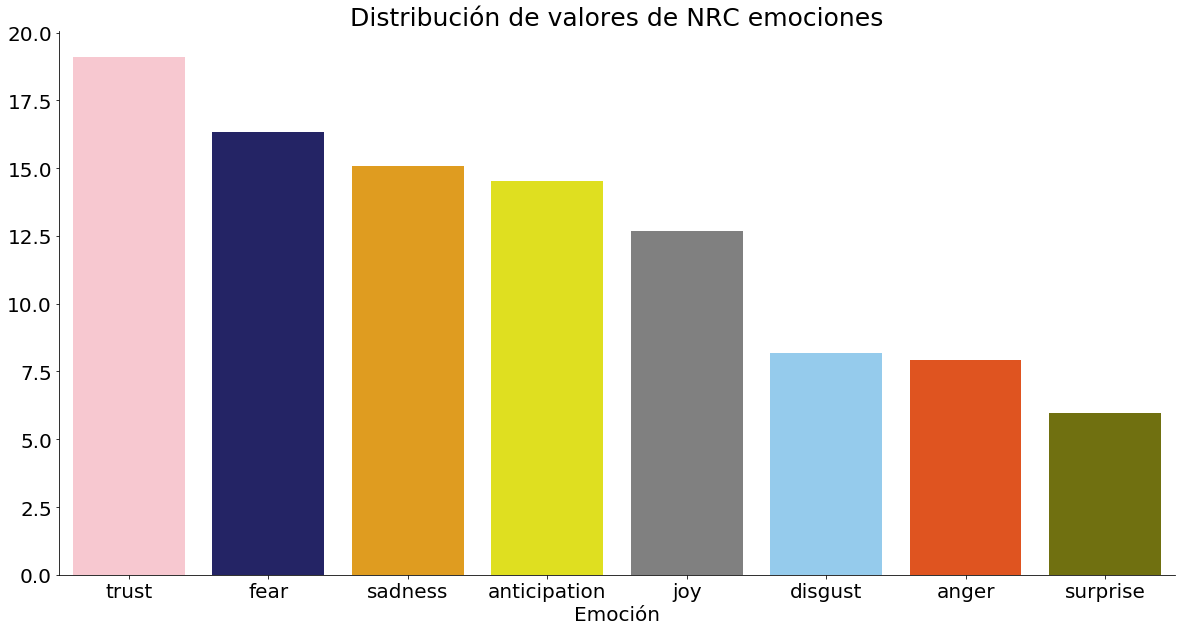

In [17]:
total_sentiments = pd.DataFrame(dataset2.sum()[['fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust']].sort_values(ascending=False))
colors = ['pink', 'midnightblue', 'orange', 'yellow', 'grey', 'lightskyblue', 'orangered',  'olive']
total_sentiments.columns = ['value']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=total_sentiments.index, y='value', data=total_sentiments, palette=sns.color_palette(colors))
plt.ylabel("")
plt.xlabel('Emoción', fontsize=20)
plt.title('Distribución de valores de NRC emociones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.despine()
plt.savefig('img/nrc_emotions_tweet0.jpg')
plt.plot();

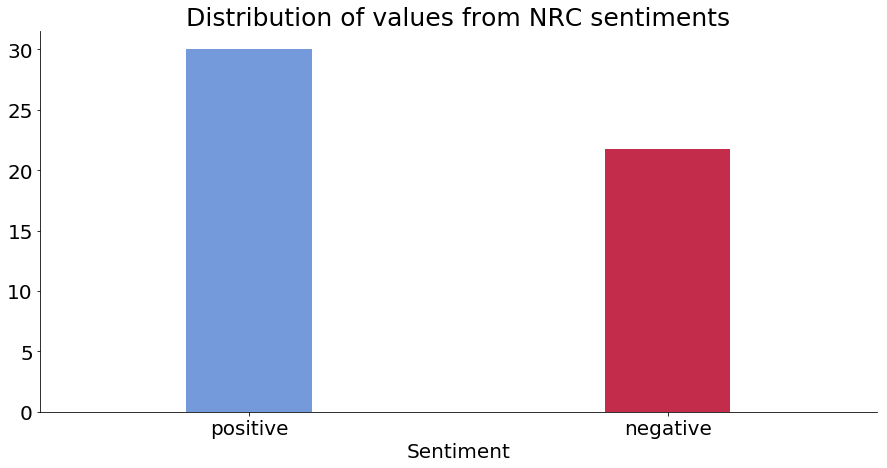

In [18]:

total_sentiment = pd.DataFrame(dataset2.sum()[['positive', 'negative']])
total_sentiment.columns = ['value']

fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=total_sentiment.index, y='value', data=total_sentiment, palette=sns.color_palette(['cornflowerblue', 'crimson']))
plt.ylabel("")
plt.xlabel('Sentiment', fontsize=20)
plt.title('Distribution of values from NRC sentiments', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .3

    # we change the bar width
    patch.set_width(.3)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
sns.despine()
plt.savefig('img/nrc_sentiments_tweet0.jpg')
plt.plot();

** Procesando el resto de Archivos **

In [19]:
 
import glob, os

In [20]:
  
#df_Tweets = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "tweets*.txt"))))


In [21]:
import dask.dataframe as dd
#df = dd.read_csv('tweets*.txt')

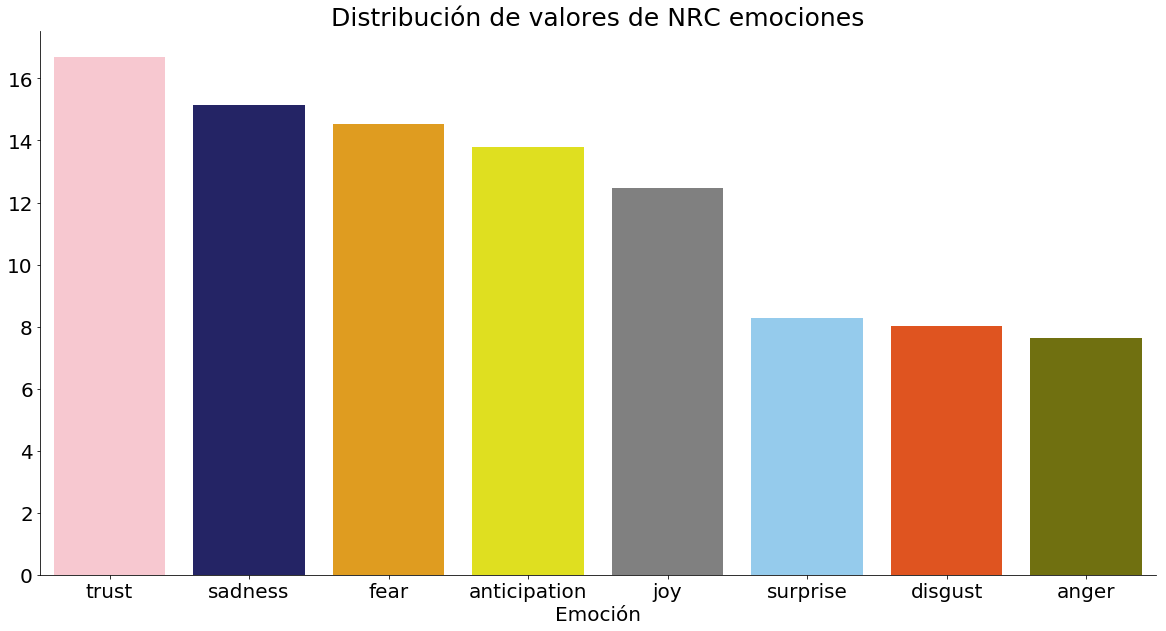

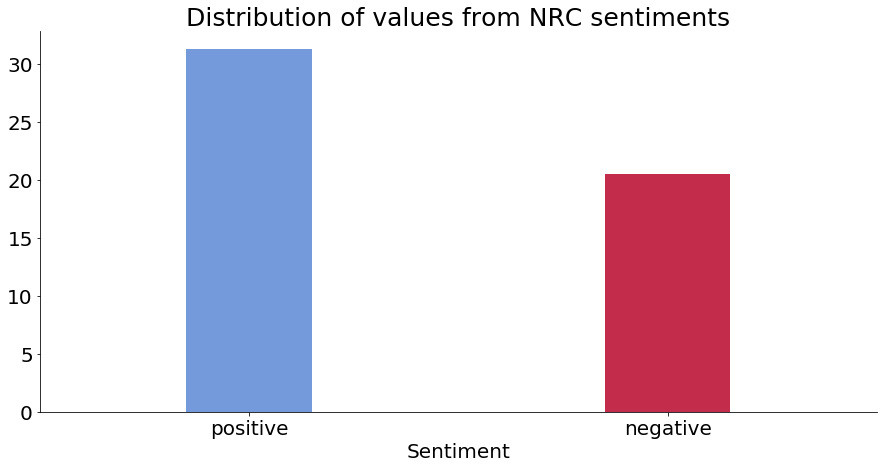

In [22]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['tweet']
dataset3 = pd.read_csv('tweets1.txt', sep='\t',names=names)
dataset3['tweetF']=[lemmatizer.lemmatize(w,'v') for w in dataset3.tweet] 
dataset3['tweetF'] = dataset3.tweetF.str.strip().str.split('[\W_]+')
rows = list()
for row in dataset3[['tweetF']].iterrows():
    r = row[1]
    for word in r.tweetF:
        rows.append((word))

tweet4 = pd.DataFrame(rows, columns=['tweet'])

summary = lexicon.summarize_doc(tweet4)
for index, _ in dataset3.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),dataset3.loc[index].tweetF))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            dataset3.at[index, key] = summary[key]
            #print(dataset2.at[index, key] )
    except:
        continue
total_sentiments = pd.DataFrame(dataset3.sum()[['fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust']].sort_values(ascending=False))
colors = ['pink', 'midnightblue', 'orange', 'yellow', 'grey', 'lightskyblue', 'orangered',  'olive']
total_sentiments.columns = ['value']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=total_sentiments.index, y='value', data=total_sentiments, palette=sns.color_palette(colors))
plt.ylabel("")
plt.xlabel('Emoción', fontsize=20)
plt.title('Distribución de valores de NRC emociones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.despine()
plt.savefig('img/nrc_emotions_tweet1.jpg')
plt.plot();
total_sentiment = pd.DataFrame(dataset3.sum()[['positive', 'negative']])
total_sentiment.columns = ['value']

fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=total_sentiment.index, y='value', data=total_sentiment, palette=sns.color_palette(['cornflowerblue', 'crimson']))
plt.ylabel("")
plt.xlabel('Sentiment', fontsize=20)
plt.title('Distribution of values from NRC sentiments', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .3

    # we change the bar width
    patch.set_width(.3)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
sns.despine()
plt.savefig('img/nrc_sentiments_tweet1.jpg')
plt.plot();

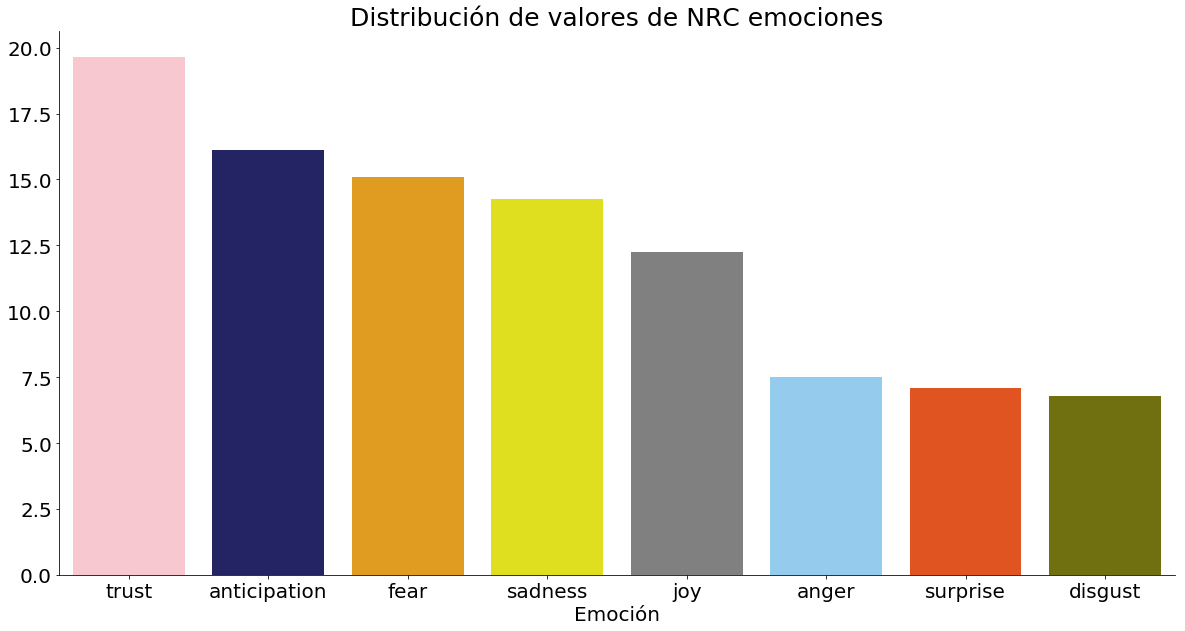

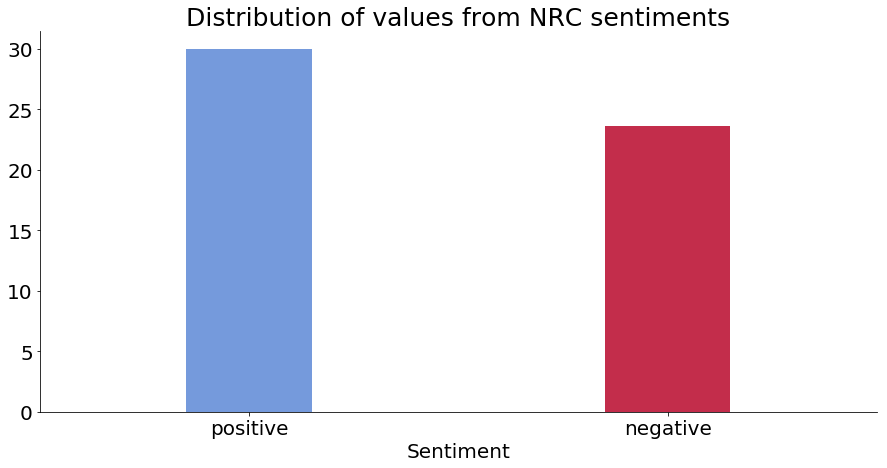

In [23]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['tweet']
dataset4 = pd.read_csv('tweets2.txt', sep='\t',names=names)
dataset4['tweetF']=[lemmatizer.lemmatize(w,'v') for w in dataset4.tweet] 
dataset4['tweetF'] = dataset4.tweetF.str.strip().str.split('[\W_]+')
rows = list()
for row in dataset4[['tweetF']].iterrows():
    r = row[1]
    for word in r.tweetF:
        rows.append((word))

tweet5 = pd.DataFrame(rows, columns=['tweet'])

summary = lexicon.summarize_doc(tweet5)
for index, _ in dataset4.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),dataset4.loc[index].tweetF))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            dataset4.at[index, key] = summary[key]
            #print(dataset2.at[index, key] )
    except:
        continue
total_sentiments = pd.DataFrame(dataset4.sum()[['fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust']].sort_values(ascending=False))
colors = ['pink', 'midnightblue', 'orange', 'yellow', 'grey', 'lightskyblue', 'orangered',  'olive']
total_sentiments.columns = ['value']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=total_sentiments.index, y='value', data=total_sentiments, palette=sns.color_palette(colors))
plt.ylabel("")
plt.xlabel('Emoción', fontsize=20)
plt.title('Distribución de valores de NRC emociones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.despine()
plt.savefig('img/nrc_emotions_tweet2.jpg')
plt.plot();

total_sentiment = pd.DataFrame(dataset4.sum()[['positive', 'negative']])
total_sentiment.columns = ['value']

fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=total_sentiment.index, y='value', data=total_sentiment, palette=sns.color_palette(['cornflowerblue', 'crimson']))
plt.ylabel("")
plt.xlabel('Sentiment', fontsize=20)
plt.title('Distribution of values from NRC sentiments', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .3

    # we change the bar width
    patch.set_width(.3)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
sns.despine()
plt.savefig('img/nrc_sentiments_tweet2.jpg')
plt.plot();

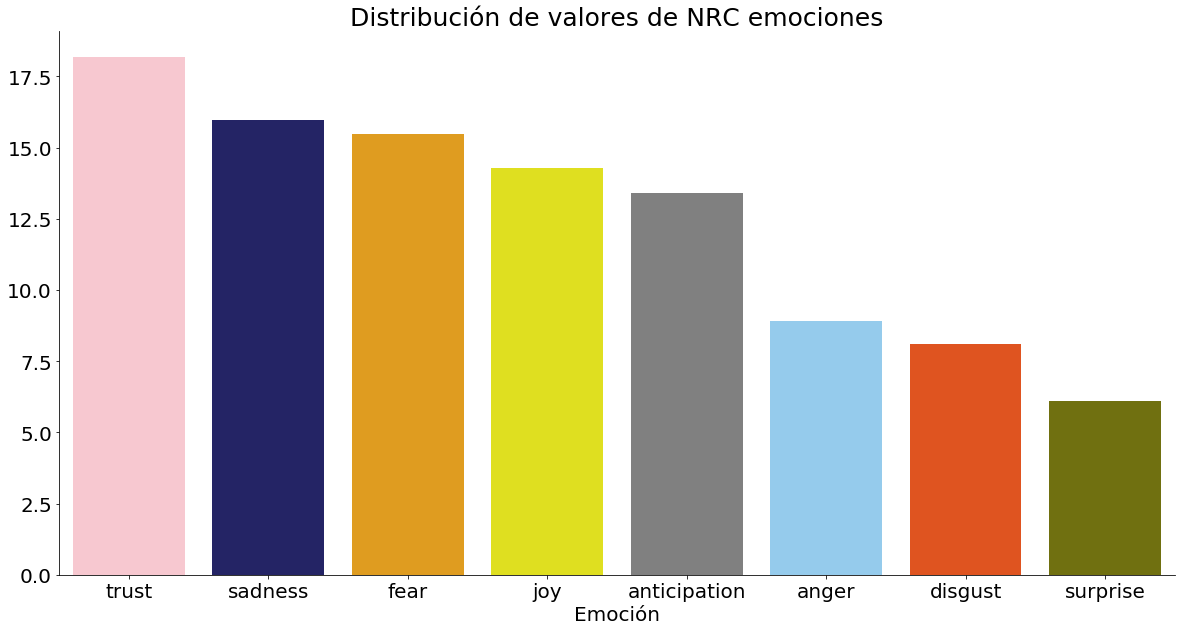

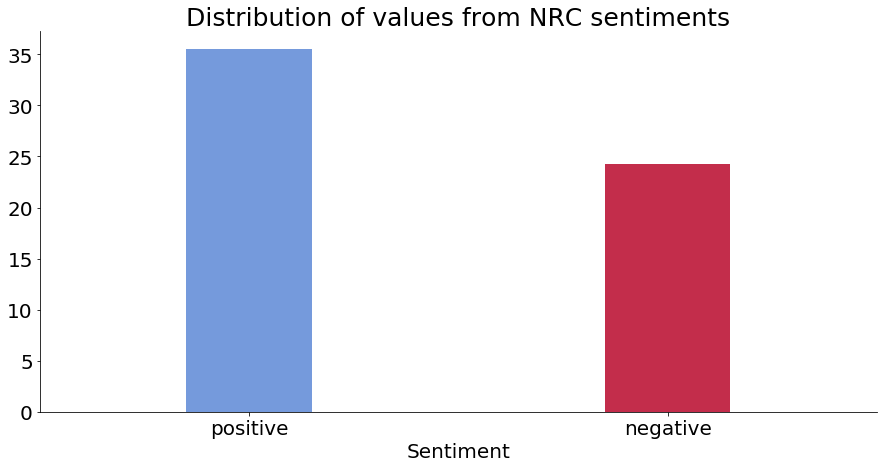

In [24]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['tweet']
dataset5 = pd.read_csv('tweets3.txt', sep='\t',names=names)
dataset5['tweetF']=[lemmatizer.lemmatize(w,'v') for w in dataset5.tweet] 
dataset5['tweetF'] = dataset5.tweetF.str.strip().str.split('[\W_]+')
rows = list()
for row in dataset5[['tweetF']].iterrows():
    r = row[1]
    for word in r.tweetF:
        rows.append((word))

tweet6 = pd.DataFrame(rows, columns=['tweet'])

summary = lexicon.summarize_doc(tweet6)
for index, _ in dataset5.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),dataset5.loc[index].tweetF))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            dataset5.at[index, key] = summary[key]
            #print(dataset2.at[index, key] )
    except:
        continue
		
		
		
total_sentiments = pd.DataFrame(dataset5.sum()[['fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust']].sort_values(ascending=False))
colors = ['pink', 'midnightblue', 'orange', 'yellow', 'grey', 'lightskyblue', 'orangered',  'olive']
total_sentiments.columns = ['value']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=total_sentiments.index, y='value', data=total_sentiments, palette=sns.color_palette(colors))
plt.ylabel("")
plt.xlabel('Emoción', fontsize=20)
plt.title('Distribución de valores de NRC emociones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.despine()
plt.savefig('img/nrc_emotions_tweet3.jpg')
plt.plot();



total_sentiment = pd.DataFrame(dataset5.sum()[['positive', 'negative']])
total_sentiment.columns = ['value']

fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=total_sentiment.index, y='value', data=total_sentiment, palette=sns.color_palette(['cornflowerblue', 'crimson']))
plt.ylabel("")
plt.xlabel('Sentiment', fontsize=20)
plt.title('Distribution of values from NRC sentiments', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .3

    # we change the bar width
    patch.set_width(.3)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
sns.despine()
plt.savefig('img/nrc_sentiments_tweet3.jpg')
plt.plot();

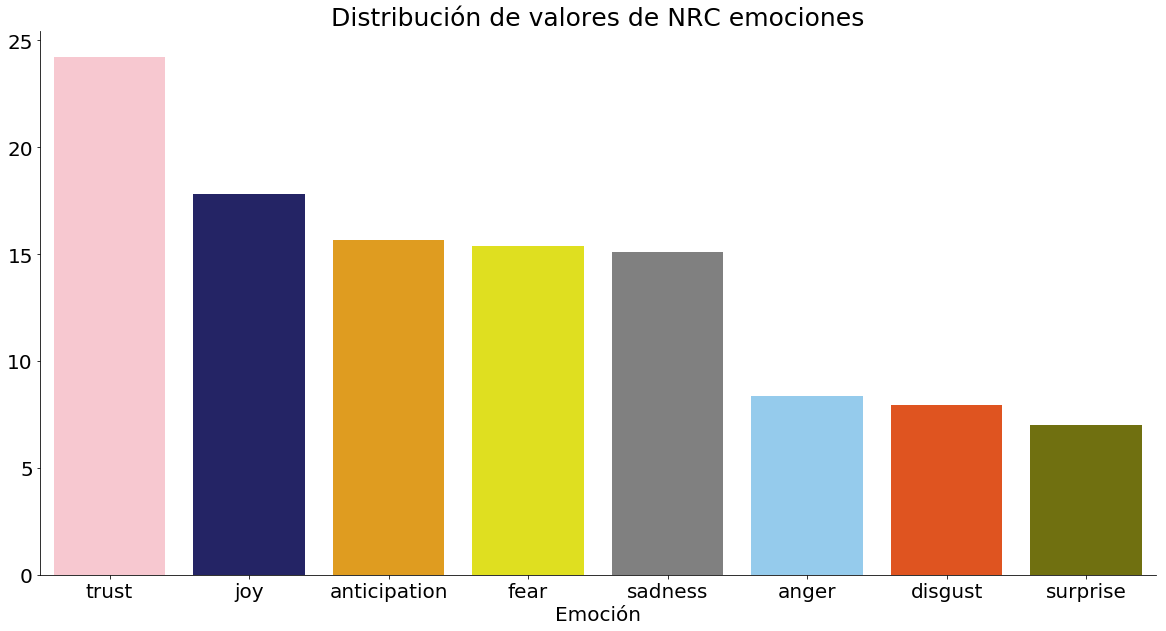

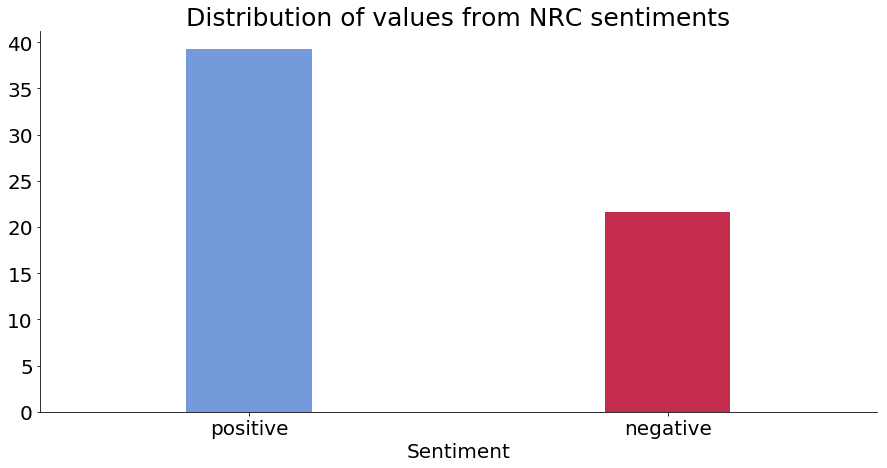

In [25]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['tweet']
dataset6 = pd.read_csv('tweets4.txt', sep='\t',names=names)
dataset6['tweetF']=[lemmatizer.lemmatize(w,'v') for w in dataset6.tweet] 
dataset6['tweetF'] = dataset6.tweetF.str.strip().str.split('[\W_]+')
rows = list()
for row in dataset6[['tweetF']].iterrows():
    r = row[1]
    for word in r.tweetF:
        rows.append((word))

tweet7 = pd.DataFrame(rows, columns=['tweet'])

summary = lexicon.summarize_doc(tweet7)
for index, _ in dataset6.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),dataset6.loc[index].tweetF))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            dataset6.at[index, key] = summary[key]
            #print(dataset2.at[index, key] )
    except:
        continue
		
		
		
total_sentiments = pd.DataFrame(dataset6.sum()[['fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust']].sort_values(ascending=False))
colors = ['pink', 'midnightblue', 'orange', 'yellow', 'grey', 'lightskyblue', 'orangered',  'olive']
total_sentiments.columns = ['value']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=total_sentiments.index, y='value', data=total_sentiments, palette=sns.color_palette(colors))
plt.ylabel("")
plt.xlabel('Emoción', fontsize=20)
plt.title('Distribución de valores de NRC emociones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.despine()
plt.savefig('img/nrc_emotions_tweet4.jpg')
plt.plot();



total_sentiment = pd.DataFrame(dataset6.sum()[['positive', 'negative']])
total_sentiment.columns = ['value']

fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=total_sentiment.index, y='value', data=total_sentiment, palette=sns.color_palette(['cornflowerblue', 'crimson']))
plt.ylabel("")
plt.xlabel('Sentiment', fontsize=20)
plt.title('Distribution of values from NRC sentiments', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .3

    # we change the bar width
    patch.set_width(.3)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
sns.despine()
plt.savefig('img/nrc_sentiments__tweet4.jpg')
plt.plot();

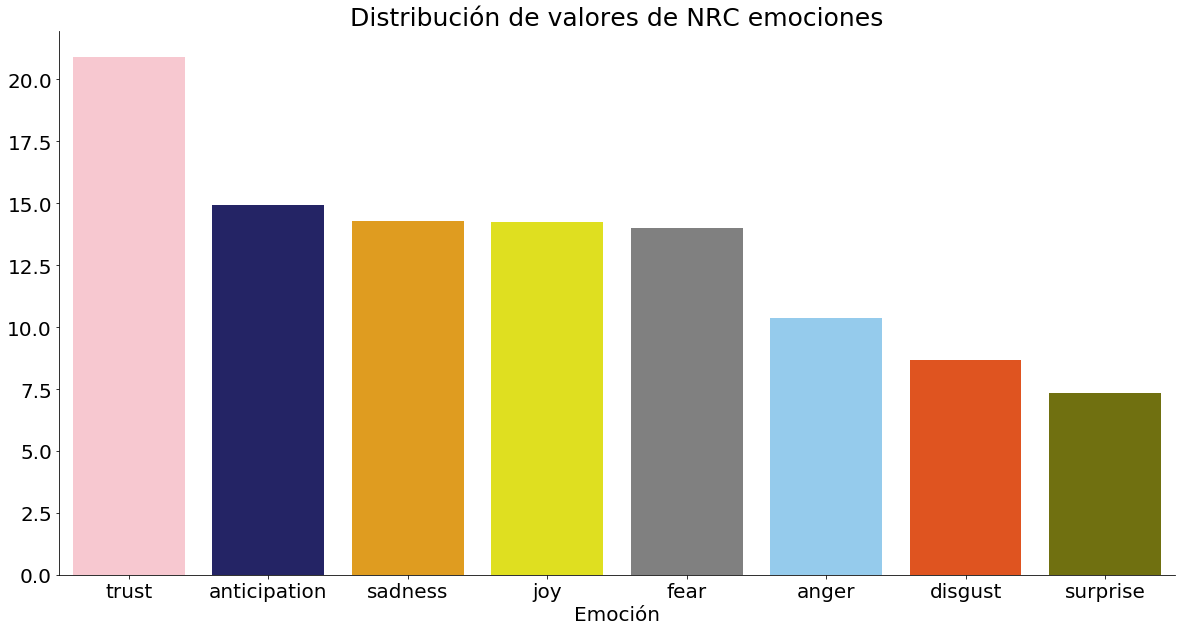

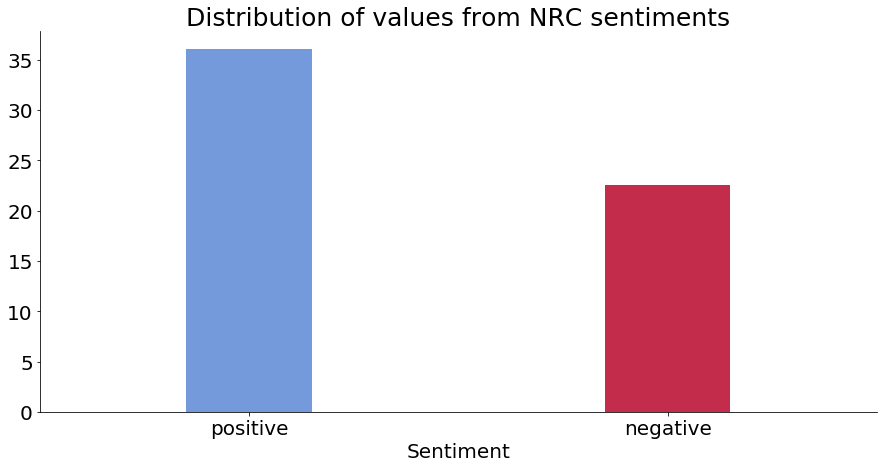

In [26]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['tweet']
dataset7 = pd.read_csv('tweets5.txt', sep='\t',names=names)
dataset7['tweetF']=[lemmatizer.lemmatize(w,'v') for w in dataset7.tweet] 
dataset7['tweetF'] = dataset7.tweetF.str.strip().str.split('[\W_]+')
rows = list()
for row in dataset7[['tweetF']].iterrows():
    r = row[1]
    for word in r.tweetF:
        rows.append((word))

tweet8 = pd.DataFrame(rows, columns=['tweet'])

summary = lexicon.summarize_doc(tweet8)
for index, _ in dataset7.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),dataset7.loc[index].tweetF))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            dataset7.at[index, key] = summary[key]
            #print(dataset2.at[index, key] )
    except:
        continue
		
		
		
total_sentiments = pd.DataFrame(dataset7.sum()[['fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust']].sort_values(ascending=False))
colors = ['pink', 'midnightblue', 'orange', 'yellow', 'grey', 'lightskyblue', 'orangered',  'olive']
total_sentiments.columns = ['value']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=total_sentiments.index, y='value', data=total_sentiments, palette=sns.color_palette(colors))
plt.ylabel("")
plt.xlabel('Emoción', fontsize=20)
plt.title('Distribución de valores de NRC emociones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.despine()
plt.savefig('img/nrc_emotions_tweet5.jpg')
plt.plot();



total_sentiment = pd.DataFrame(dataset7.sum()[['positive', 'negative']])
total_sentiment.columns = ['value']

fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=total_sentiment.index, y='value', data=total_sentiment, palette=sns.color_palette(['cornflowerblue', 'crimson']))
plt.ylabel("")
plt.xlabel('Sentiment', fontsize=20)
plt.title('Distribution of values from NRC sentiments', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .3

    # we change the bar width
    patch.set_width(.3)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
sns.despine()
plt.savefig('img/nrc_sentiments_tweet5.jpg')
plt.plot();

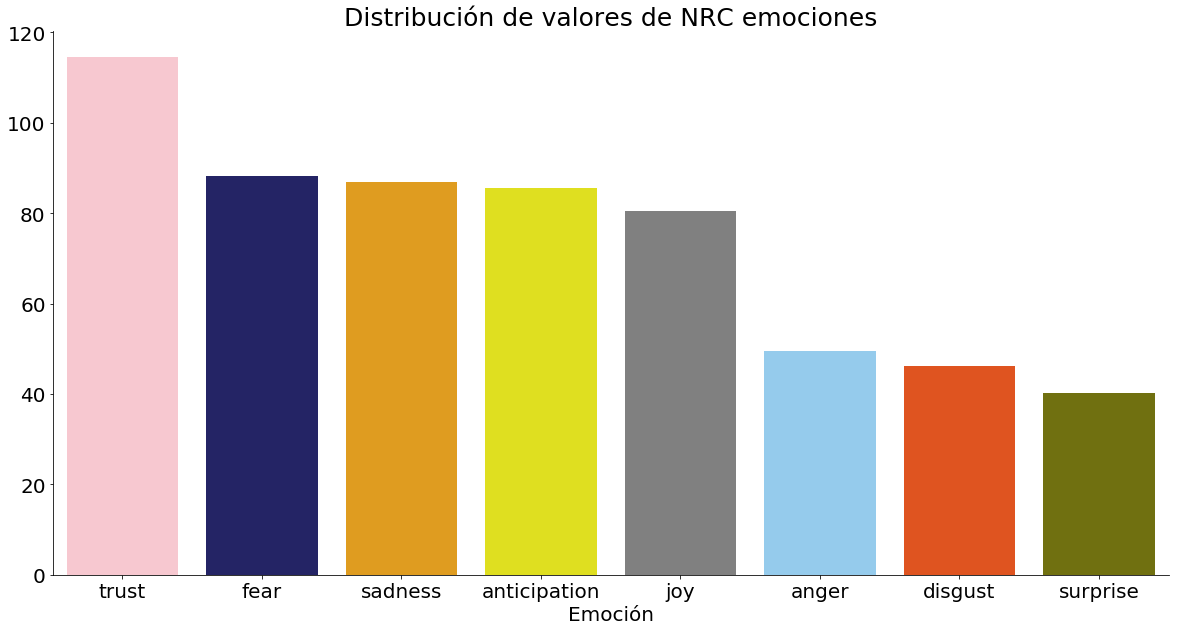

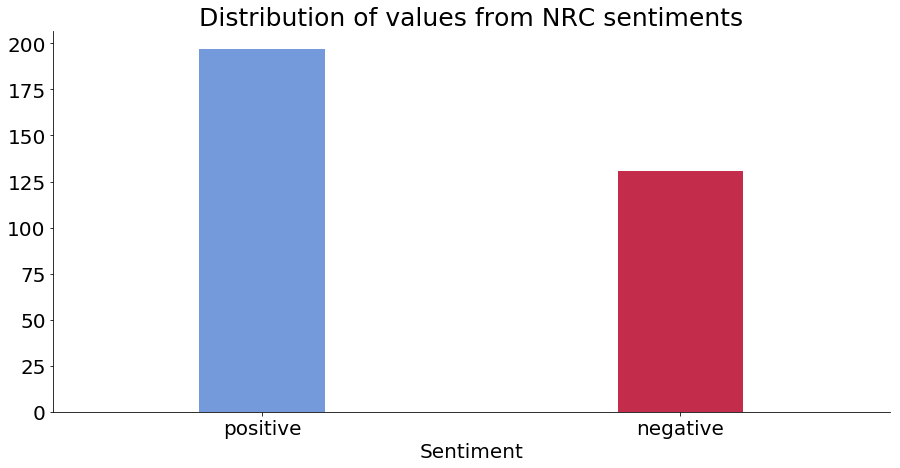

In [27]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['tweet']
dataset8 = pd.read_csv('tweets6.txt', sep='\t',names=names)
dataset8['tweetF']=[lemmatizer.lemmatize(w,'v') for w in dataset8.tweet] 
dataset8['tweetF'] = dataset8.tweetF.str.strip().str.split('[\W_]+')
rows = list()
for row in dataset8[['tweetF']].iterrows():
    r = row[1]
    for word in r.tweetF:
        rows.append((word))

tweet9 = pd.DataFrame(rows, columns=['tweet'])

summary = lexicon.summarize_doc(tweet9)
for index, _ in dataset8.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),dataset8.loc[index].tweetF))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            dataset8.at[index, key] = summary[key]
            #print(dataset2.at[index, key] )
    except:
        continue
		
		
		
total_sentiments = pd.DataFrame(dataset8.sum()[['fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust']].sort_values(ascending=False))
colors = ['pink', 'midnightblue', 'orange', 'yellow', 'grey', 'lightskyblue', 'orangered',  'olive']
total_sentiments.columns = ['value']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=total_sentiments.index, y='value', data=total_sentiments, palette=sns.color_palette(colors))
plt.ylabel("")
plt.xlabel('Emoción', fontsize=20)
plt.title('Distribución de valores de NRC emociones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.despine()
plt.savefig('img/nrc_emotions_total.jpg')
plt.plot();



total_sentiment = pd.DataFrame(dataset8.sum()[['positive', 'negative']])
total_sentiment.columns = ['value']

fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=total_sentiment.index, y='value', data=total_sentiment, palette=sns.color_palette(['cornflowerblue', 'crimson']))
plt.ylabel("")
plt.xlabel('Sentiment', fontsize=20)
plt.title('Distribution of values from NRC sentiments', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .3

    # we change the bar width
    patch.set_width(.3)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
sns.despine()
plt.savefig('img/nrc_sentiments_total.jpg')
plt.plot();